In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [395]:
#Loading imputed dataset
df = pd.read_csv("train_imputed.csv", index_col=0)

In [396]:
df.shape

(1460, 78)

In [397]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000000,8450,Pave,No_Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_FP,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Pool,No_Fence,No_MF,0,2,2008,WD,Normal,208500
2,20,RL,80.000000,9600,Pave,No_Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Pool,No_Fence,No_MF,0,5,2007,WD,Normal,181500
3,60,RL,68.000000,11250,Pave,No_Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Pool,No_Fence,No_MF,0,9,2008,WD,Normal,223500
4,70,RL,60.000000,9550,Pave,No_Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Pool,No_Fence,No_MF,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000000,14260,Pave,No_Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Pool,No_Fence,No_MF,0,12,2008,WD,Normal,250000
6,50,RL,85.000000,14115,Pave,No_Alley,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,No_FP,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,No_Pool,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.000000,10084,Pave,No_Alley,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,No_Pool,No_Fence,No_MF,0,8,2007,WD,Normal,307000
8,60,RL,71.002296,10382,Pave,No_Alley,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No_Pool,No_Fence,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.000000,6120,Pave,No_Alley,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,No_Pool,No_Fence,No_MF,0,4,2008,WD,Abnorml,129900


In [398]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


- Differentating Numerical & Categorical features

In [399]:
df_num = df.select_dtypes(include = ["int64", "float64"])

In [400]:
df_num.head(5)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [401]:
print(df_num.dtypes.value_counts())
print(df_num.shape)

int64      33
float64     3
dtype: int64
(1460, 36)


- As we know some of the numerical features above are categorical like MSSubClass, OverallQual,OverallCond, etc, we will convert them to object type. For more details please refer: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [402]:
df2 = df.copy()
df2.shape

(1460, 78)

In [403]:
df2[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df2[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype(object)


In [404]:
df_cat = df2.select_dtypes(include = ["object"])

In [405]:
print(df_cat.dtypes.value_counts())
print(df_cat.shape)

object    47
dtype: int64
(1460, 47)


In [406]:
df_num.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold'], axis = 1, inplace=True)

C:\Users\rajes\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [407]:
print(df_cat.shape)
print(df_num.shape)

(1460, 47)
(1460, 31)


In [408]:
df_num.dtypes.value_counts()

int64      28
float64     3
dtype: int64

- Let's check corelation now!

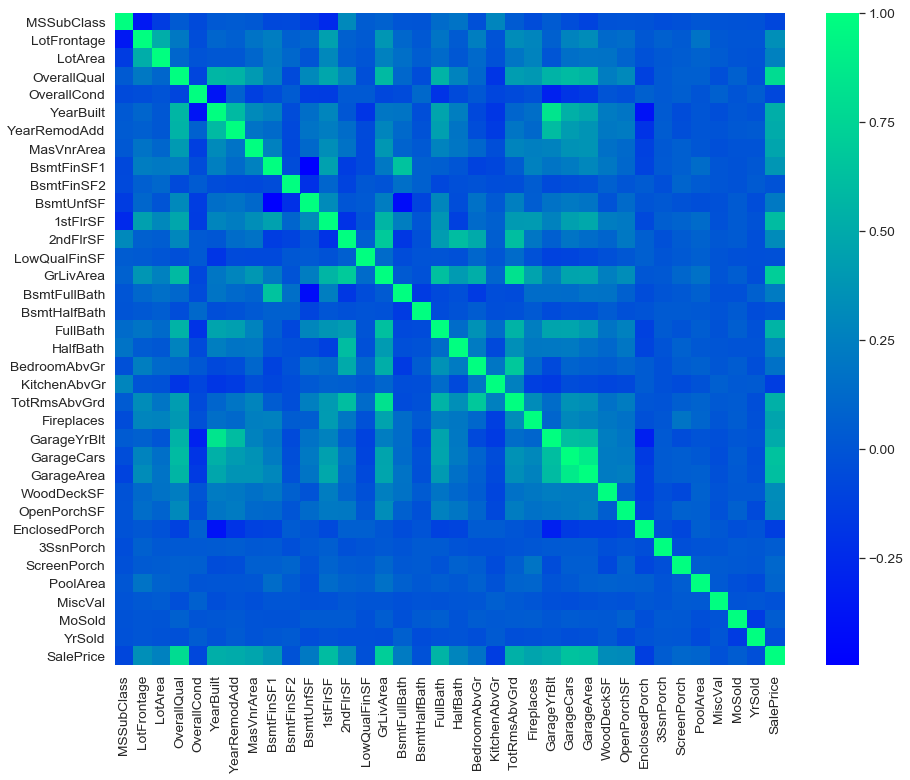

In [409]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap="winter")


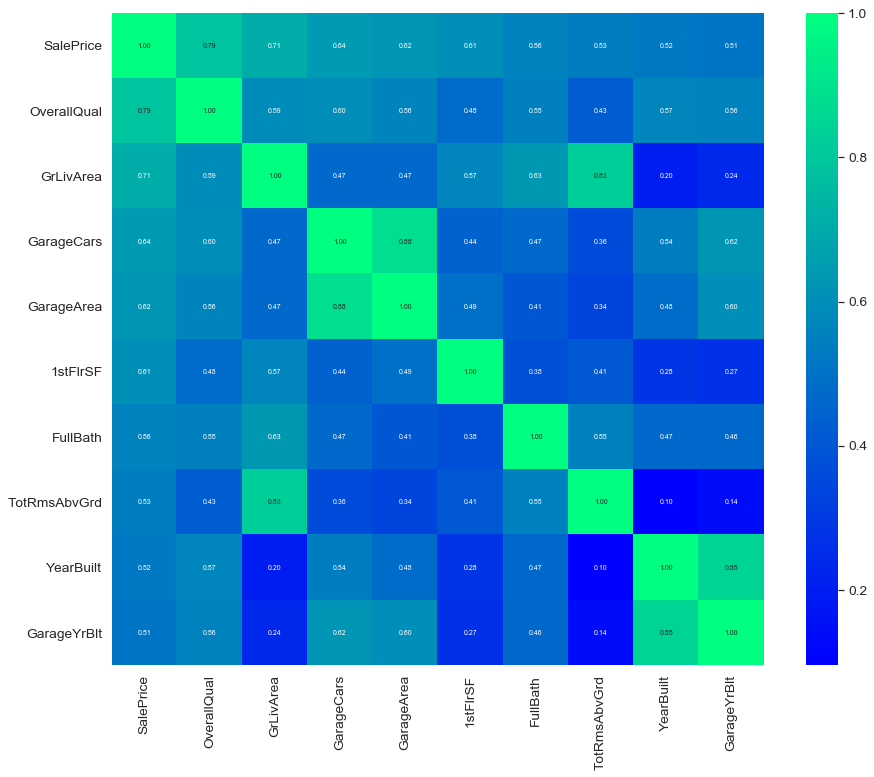

In [410]:
# saleprice correlation matrix

corr_num = 10 #number of variables for heatmap
cols_corr = corr.nlargest(corr_num, 'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(df[cols_corr].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15, 12))
hm = sns.heatmap(corr_mat_sales, cbar=True, annot=True, square=True, fmt='.2f', cmap="winter", annot_kws={'size': 7}, yticklabels=cols_corr.values, xticklabels=cols_corr.values)
plt.show()
#sns.heatmap(corr, cmap="winter")


From above corelation, below features contribute more:
- OverallQual
- GrLivArea
- GarageCars[As GarageCars depends on no.of cars that fit in a GarageArea its more or less the same, we can just consider GarageCars as it's corelation is higher with SalesPrice]
- FullBath
- YearBuilt

#  Linearity & Outliers

In [411]:
df.shape

(1460, 78)

OverallQual Vs SalePrice

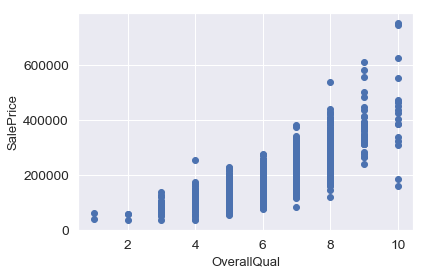

In [412]:
fig, ax = plt.subplots()
ax.scatter(x = df['OverallQual'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

- GrLivArea Vs SalePrice

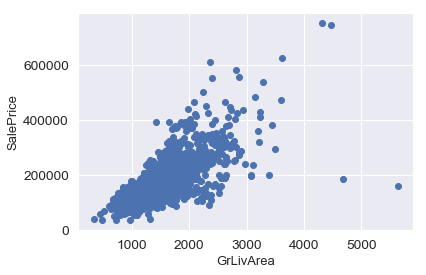

In [413]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

- Outliers

In [414]:
#Taking care of Outliers
df.drop(df[df.GrLivArea>4000].index, inplace = True)

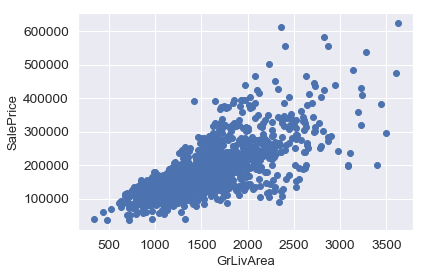

In [415]:
#Plotting after removing outliers
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

- GarageCars Vs SalePrice

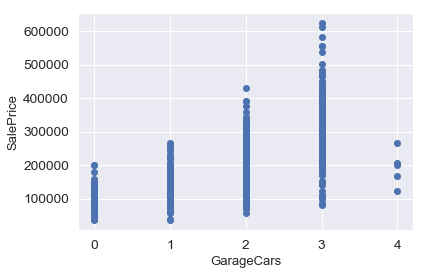

In [416]:
fig, ax = plt.subplots()
ax.scatter(x = df['GarageCars'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()

- FullBath Vs SalePrice

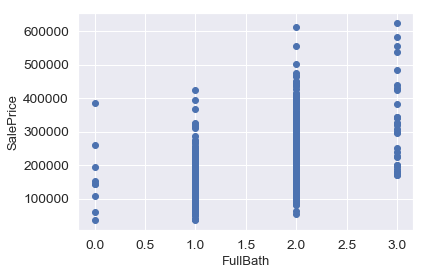

In [417]:
fig, ax = plt.subplots()
ax.scatter(x = df['FullBath'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('FullBath', fontsize=13)
plt.show()

- YearBuilt Vs SalePrice

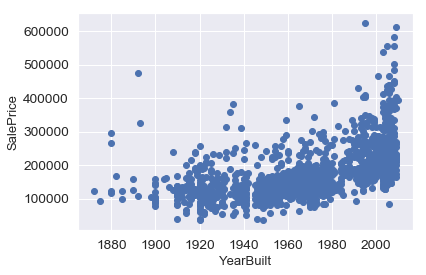

In [418]:
fig, ax = plt.subplots()
ax.scatter(x = df['YearBuilt'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

- Outliers

In [419]:
#Dropping observatins where YearBuilt is less than 1900
df.drop(df[df.YearBuilt<1900].index, inplace = True)

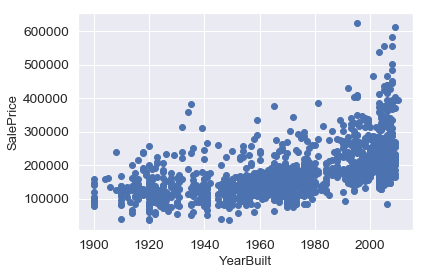

In [420]:
fig, ax = plt.subplots()
ax.scatter(x = df['YearBuilt'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

# Normality & Transformation


 mu = 180148.03 and sigma = 76296.74



Text(0.5, 0.98, 'Before transformation')

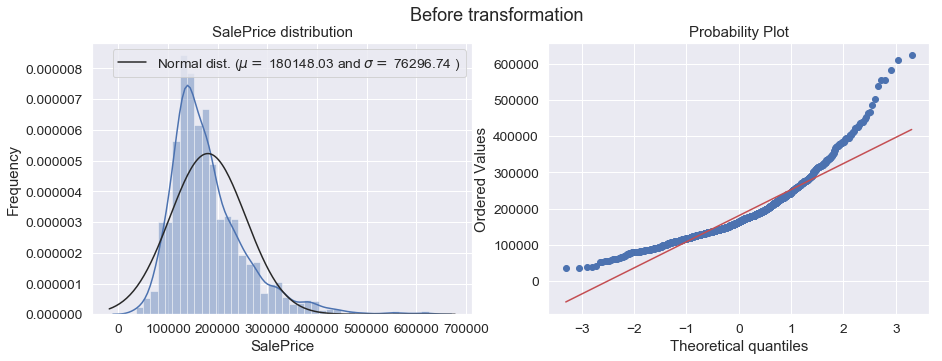

In [421]:
#Boxcox Transformation

from scipy import stats
from scipy.stats import norm, skew #for some statistics
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(df['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

In [422]:
# Apply transformation
df.SalePrice = np.log1p(df.SalePrice )


 mu = 12.02 and sigma = 0.39



Text(0.5, 0.98, 'After transformation')

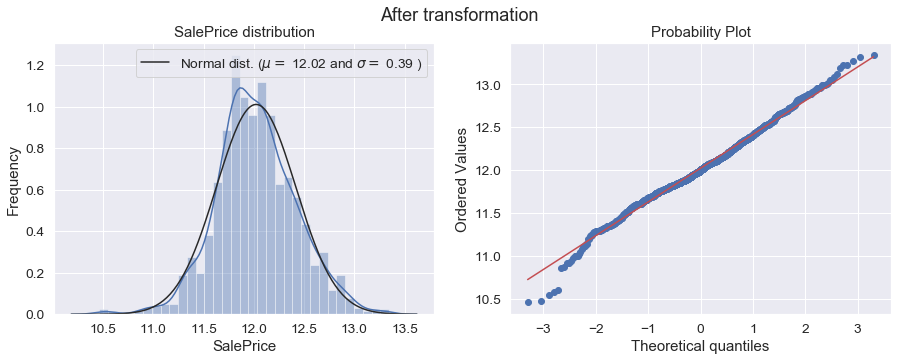

In [423]:
# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(df['SalePrice'], plot=plt)
plt.suptitle('After transformation')

- Let's calculate skewnsess for numeric input variables

In [424]:

skew_num = pd.DataFrame(data = df.select_dtypes(include = ['int64', 'float64']).skew(), columns=['Skewness'])
skew_num

,Skewness
MSSubClass,1.407184
LotFrontage,1.814294
LotArea,12.570867
OverallQual,0.165184
OverallCond,0.665239
YearBuilt,-0.507857
YearRemodAdd,-0.496319
MasVnrArea,2.641525
BsmtFinSF1,0.735068
BsmtFinSF2,4.223466


- If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [425]:
#Extract numeric variables merged data.
df_num2 = df.select_dtypes(include = ['int64', 'float64'])

In [426]:
#Transformation of input variables
df_skewed = np.log1p(df_num2[df_num2.skew()[df_num2.skew() > 0.5].index])


#Normal variables
df_normal = df_num2[df_num2.skew()[df_num2.skew() < 0.5].index]
    
#Merging
df_num3 = pd.concat([df_skewed, df_normal], axis = 1)

In [427]:
df_num2.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.000000,8450,7,5,2003,2003,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699
2,20,80.000000,9600,6,8,1976,1976,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016
3,60,68.000000,11250,7,5,2001,2002,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171
4,70,60.000000,9550,7,5,1915,1970,0.0,216,0,540,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405
5,60,84.000000,14260,8,5,2000,2000,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220
6,50,85.000000,14115,5,5,1993,1995,0.0,732,0,64,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,11.870607
7,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,317,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,12.634606
8,60,71.002296,10382,7,6,1973,1973,240.0,859,32,216,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,12.206078
9,50,51.000000,6120,7,5,1931,1950,0.0,0,0,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,11.774528


In [428]:
df_num3.head(10)

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,OverallQual,YearBuilt,YearRemodAdd,FullBath,BedroomAbvGr,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.110874,4.189655,9.042040,1.791759,5.283204,6.561031,0.000000,5.017280,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,0.693147,0.693147,2.197225,0.000000,0.000000,4.127134,0.000000,0.000000,0.0,0.0,0.000000,7,2003,2003,2,3,2003.0,2,548,2,2008,12.247699
2,3.044522,4.394449,9.169623,2.197225,0.000000,6.886532,0.000000,5.652489,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,0.000000,0.693147,1.945910,0.693147,5.700444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,6,1976,1976,2,3,1976.0,2,460,5,2007,12.109016
3,4.110874,4.234107,9.328212,1.791759,5.093750,6.188264,0.000000,6.075346,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,0.693147,0.693147,1.945910,0.693147,0.000000,3.761200,0.000000,0.000000,0.0,0.0,0.000000,7,2001,2002,2,3,2001.0,2,608,9,2008,12.317171
4,4.262680,4.110874,9.164401,1.791759,0.000000,5.379897,0.000000,6.293419,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.000000,0.693147,2.079442,0.693147,0.000000,3.583519,5.609472,0.000000,0.0,0.0,0.000000,7,1915,1970,1,3,1998.0,3,642,2,2006,11.849405
5,4.110874,4.442651,9.565284,1.791759,5.860786,6.486161,0.000000,6.196444,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,0.693147,0.693147,2.302585,0.693147,5.262690,4.442651,0.000000,0.000000,0.0,0.0,0.000000,8,2000,2000,2,4,2000.0,3,836,12,2008,12.429220
6,3.931826,4.454347,9.555064,1.791759,0.000000,6.597146,0.000000,4.174387,6.680855,6.340359,0.0,7.217443,0.693147,0.000000,0.693147,0.693147,1.791759,0.000000,3.713572,3.433987,0.000000,5.771441,0.0,0.0,6.552508,5,1993,1995,1,1,1993.0,2,480,10,2009,11.870607
7,3.044522,4.330733,9.218804,1.791759,5.231109,7.222566,0.000000,5.762051,7.435438,0.000000,0.0,7.435438,0.693147,0.000000,0.000000,0.693147,2.079442,0.693147,5.545177,4.060443,0.000000,0.000000,0.0,0.0,0.000000,8,2004,2005,2,3,2004.0,2,636,8,2007,12.634606
8,4.110874,4.276698,9.247925,1.945910,5.484797,6.756932,3.496508,5.379897,7.010312,6.891626,0.0,7.645398,0.693147,0.000000,0.693147,0.693147,2.079442,1.098612,5.463832,5.323010,5.433722,0.000000,0.0,0.0,5.860786,7,1973,1973,2,3,1973.0,2,484,11,2009,12.206078
9,3.931826,3.951244,8.719481,1.791759,0.000000,0.000000,0.000000,6.859615,6.930495,6.624065,0.0,7.481556,0.000000,0.000000,0.000000,1.098612,2.197225,1.098612,4.510860,0.000000,5.327876,0.000000,0.0,0.0,0.000000,7,1931,1950,2,2,1931.0,2,468,4,2008,11.774528


In [429]:
df_num2.update(df_num3)

C:\Users\rajes\Anaconda3\lib\site-packages\pandas\core\frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


In [430]:
df_num2.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.110874,4.189655,9.042040,7,1.791759,2003,2003,5.283204,6.561031,0.000000,5.017280,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2.197225,0.000000,2003.0,2,548,0.000000,4.127134,0.000000,0.000000,0.0,0.0,0.000000,2,2008,12.247699
2,3.044522,4.394449,9.169623,6,2.197225,1976,1976,0.000000,6.886532,0.000000,5.652489,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1.945910,0.693147,1976.0,2,460,5.700444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,5,2007,12.109016
3,4.110874,4.234107,9.328212,7,1.791759,2001,2002,5.093750,6.188264,0.000000,6.075346,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,1.945910,0.693147,2001.0,2,608,0.000000,3.761200,0.000000,0.000000,0.0,0.0,0.000000,9,2008,12.317171
4,4.262680,4.110874,9.164401,7,1.791759,1915,1970,0.000000,5.379897,0.000000,6.293419,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2.079442,0.693147,1998.0,3,642,0.000000,3.583519,5.609472,0.000000,0.0,0.0,0.000000,2,2006,11.849405
5,4.110874,4.442651,9.565284,8,1.791759,2000,2000,5.860786,6.486161,0.000000,6.196444,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2.302585,0.693147,2000.0,3,836,5.262690,4.442651,0.000000,0.000000,0.0,0.0,0.000000,12,2008,12.429220
6,3.931826,4.454347,9.555064,5,1.791759,1993,1995,0.000000,6.597146,0.000000,4.174387,6.680855,6.340359,0.0,7.217443,0.693147,0.000000,1,0.693147,1,0.693147,1.791759,0.000000,1993.0,2,480,3.713572,3.433987,0.000000,5.771441,0.0,0.0,6.552508,10,2009,11.870607
7,3.044522,4.330733,9.218804,8,1.791759,2004,2005,5.231109,7.222566,0.000000,5.762051,7.435438,0.000000,0.0,7.435438,0.693147,0.000000,2,0.000000,3,0.693147,2.079442,0.693147,2004.0,2,636,5.545177,4.060443,0.000000,0.000000,0.0,0.0,0.000000,8,2007,12.634606
8,4.110874,4.276698,9.247925,7,1.945910,1973,1973,5.484797,6.756932,3.496508,5.379897,7.010312,6.891626,0.0,7.645398,0.693147,0.000000,2,0.693147,3,0.693147,2.079442,1.098612,1973.0,2,484,5.463832,5.323010,5.433722,0.000000,0.0,0.0,5.860786,11,2009,12.206078
9,3.931826,3.951244,8.719481,7,1.791759,1931,1950,0.000000,0.000000,0.000000,6.859615,6.930495,6.624065,0.0,7.481556,0.000000,0.000000,2,0.000000,2,1.098612,2.197225,1.098612,1931.0,2,468,4.510860,0.000000,5.327876,0.000000,0.0,0.0,0.000000,4,2008,11.774528


# Feature Engineering

In [431]:
df.dtypes.value_counts()

object     42
int64      32
float64     4
dtype: int64

In [432]:
df_cat2 = df.select_dtypes(include = ['object']).astype('category')
df_cat2.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,No_Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No_FP,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,No_MF,WD,Normal
2,RL,Pave,No_Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,No_MF,WD,Normal
3,RL,Pave,No_Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,No_MF,WD,Normal


In [433]:
df_cat2.dtypes.value_counts()

category    2
category    2
category    2
category    2
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
dtype: int64

- Label Encoding of Ordinal features

In [434]:
#Label Encoding of Ordinal Variables 
df_cat2.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_cat2.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_cat2.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_cat2.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_cat2.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat2.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
#df_cat2.BsmtQual.replace(to_replace = ['No_Bsmt'], value = [0], inplace = True)
df_cat2.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat2.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat2.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_cat2.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_cat2.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat2.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_cat2.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_cat2.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_cat2.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_cat2.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_cat2.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_cat2.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_cat2.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_cat2.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [435]:
df_cat2['BsmtQual'] = df_cat2['BsmtQual'].replace('No_Bsmt', 0)
df_cat2['BsmtCond'] = df_cat2['BsmtCond'].replace('No_Bsmt', 0)
df_cat2['BsmtExposure'] = df_cat2['BsmtExposure'].replace('No_Bsmt', 0)
df_cat2['BsmtFinType1'] = df_cat2['BsmtFinType1'].replace('No_Bsmt', 0)
df_cat2['BsmtFinType2'] = df_cat2['BsmtFinType2'].replace('No_Bsmt', 0)
df_cat2['FireplaceQu'] = df_cat2['FireplaceQu'].replace('No_FP', 0)
df_cat2['GarageFinish'] = df_cat2['GarageFinish'].replace('No_G', 0)
df_cat2['GarageCond'] = df_cat2['GarageCond'].replace('No_G', 0)
df_cat2['PoolQC'] = df_cat2['PoolQC'].replace('No_Pool', 0)
df_cat2['Fence'] = df_cat2['Fence'].replace('No_Fence', 0)

In [436]:
df_cat2.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,No_Alley,3,3,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,2,PConc,3,3,1,6,1,GasA,4,Y,4,2,6,0,Attchd,2,TA,3,2,0,0,No_MF,WD,Normal
2,RL,Pave,No_Alley,3,3,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,1,2,CBlock,3,3,4,5,1,GasA,4,Y,4,1,6,3,Attchd,2,TA,3,2,0,0,No_MF,WD,Normal
3,RL,Pave,No_Alley,2,3,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,2,PConc,3,3,2,6,1,GasA,4,Y,4,2,6,3,Attchd,2,TA,3,2,0,0,No_MF,WD,Normal
4,RL,Pave,No_Alley,2,3,Corner,2,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,1,2,BrkTil,2,4,1,5,1,GasA,3,Y,4,2,6,4,Detchd,1,TA,3,2,0,0,No_MF,WD,Abnorml
5,RL,Pave,No_Alley,2,3,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,2,2,PConc,3,3,3,6,1,GasA,4,Y,4,2,6,3,Attchd,2,TA,3,2,0,0,No_MF,WD,Normal
6,RL,Pave,No_Alley,2,3,Inside,2,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,1,2,Wood,3,3,1,6,1,GasA,4,Y,4,1,6,0,Attchd,1,TA,3,2,0,3,Shed,WD,Normal
7,RL,Pave,No_Alley,3,3,Inside,2,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,2,2,PConc,4,3,3,6,1,GasA,4,Y,4,2,6,4,Attchd,2,TA,3,2,0,0,No_MF,WD,Normal
8,RL,Pave,No_Alley,2,3,Corner,2,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,1,2,CBlock,3,3,2,5,4,GasA,4,Y,4,1,6,3,Attchd,2,TA,3,2,0,0,Shed,WD,Normal
9,RM,Pave,No_Alley,3,3,Inside,2,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,1,2,BrkTil,2,3,1,1,1,GasA,3,Y,2,1,5,3,Detchd,1,Fa,3,2,0,0,No_MF,WD,Abnorml


In [437]:
df_cat2.dtypes.value_counts()

int64       20
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [438]:
#Label Encoded Variables
df_label_encoded = df_cat2.select_dtypes(include = ['int64'])
df_label_encoded.head(10)

,LotShape,LandContour,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageCond,PavedDrive,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,
1,3,3,2,2,2,3,3,1,6,1,4,4,2,6,0,2,3,2,0,0
2,3,3,2,1,2,3,3,4,5,1,4,4,1,6,3,2,3,2,0,0
3,2,3,2,2,2,3,3,2,6,1,4,4,2,6,3,2,3,2,0,0
4,2,3,2,1,2,2,4,1,5,1,3,4,2,6,4,1,3,2,0,0
5,2,3,2,2,2,3,3,3,6,1,4,4,2,6,3,2,3,2,0,0
6,2,3,2,1,2,3,3,1,6,1,4,4,1,6,0,1,3,2,0,3
7,3,3,2,2,2,4,3,3,6,1,4,4,2,6,4,2,3,2,0,0
8,2,3,2,1,2,3,3,2,5,4,4,4,1,6,3,2,3,2,0,0
9,3,3,2,1,2,2,3,1,1,1,3,2,1,5,3,1,3,2,0,0


In [439]:
df_label_encoded.dtypes.value_counts()

int64    20
dtype: int64

In [440]:
df_label_encoded.shape

(1441, 20)

 ## Dummification

In [441]:
df_cat2.dtypes.value_counts()

int64       20
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [442]:
df_one_hot = df_cat2.select_dtypes(include=['category'])
df_one_hot = pd.get_dummies(df_one_hot, drop_first=True)

In [443]:
#concat one hot encoded and label encoded variable together

df_merged_encoded = pd.concat([df_one_hot, df_label_encoded], axis=1)

#Finally join processed categorical and numerical variables'''
df_final = pd.concat([df_num3, df_merged_encoded], axis=1)


In [444]:
df_final.dtypes.value_counts()

uint8      142
int64       29
float64     27
dtype: int64

In [445]:
df_final.head(3)

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,OverallQual,YearBuilt,YearRemodAdd,FullBath,BedroomAbvGr,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_G,GarageQual_Fa,GarageQual_Gd,GarageQual_No_G,GarageQual_Po,GarageQual_TA,MiscFeature_No_MF,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageCond,PavedDrive,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.110874,4.189655,9.042040,1.791759,5.283204,6.561031,0.0,5.017280,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,0.693147,0.693147,2.197225,0.000000,0.000000,4.127134,0.0,0.0,0.0,0.0,0.0,7,2003,2003,2,3,2003.0,2,548,2,2008,12.247699,0,0,1,0,1,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,2,2,2,3,3,1,6,1,4,4,2,6,0,2,3,2,0,0
2,3.044522,4.394449,9.169623,2.197225,0.000000,6.886532,0.0,5.652489,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,0.000000,0.693147,1.945910,0.693147,5.700444,0.000000,0.0,0.0,0.0,0.0,0.0,6,1976,1976,2,3,1976.0,2,460,5,2007,12.109016,0,0,1,0,1,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,2,1,2,3,3,4,5,1,4,4,1,6,3,2,3,2,0,0
3,4.110874,4.234107,9.328212,1.791759,5.093750,6.188264,0.0,6.075346,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,0.693147,0.693147,1.945910,0.693147,0.000000,3.761200,0.0,0.0,0.0,0.0,0.0,7,2001,2002,2,3,2001.0,2,608,9,2008,12.317171,0,0,1,0,1,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,3,2,2,2,3,3,2,6,1,4,4,2,6,3,2,3,2,0,0


In [446]:
df_final1 = df_final.drop('SalePrice', axis=1)
X = df_final1
Y = df_final['SalePrice']

In [462]:
X.shape

(1441, 197)

In [463]:
Y.shape

(1441,)

In [461]:
X.sample(2)

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,OverallQual,YearBuilt,YearRemodAdd,FullBath,BedroomAbvGr,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_G,GarageQual_Fa,GarageQual_Gd,GarageQual_No_G,GarageQual_Po,GarageQual_TA,MiscFeature_No_MF,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageCond,PavedDrive,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202,3.044522,4.330733,9.222862,1.945910,0.0,6.464588,5.63479,5.624018,7.154615,0.0,0.0,7.154615,0.000000,0.693147,0.0,0.693147,1.945910,1.098612,5.476464,4.430817,0.0,0.0,0.0,0.0,0.0,6,1977,1977,2,3,1980.0,2,473,2,2008,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,2,1,2,2,3,1,5,2,2,4,1,6,2,1,3,2,0,3
147,3.433987,3.951244,8.719481,2.079442,0.0,5.347108,0.00000,6.228511,6.775366,0.0,0.0,6.775366,0.693147,0.000000,0.0,0.693147,1.791759,0.000000,3.891820,0.000000,0.0,0.0,0.0,0.0,0.0,5,1931,1993,1,2,1931.0,1,180,11,2009,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,3,2,1,2,2,3,1,4,1,2,3,1,6,0,1,3,2,0,0


# Model Building

In [488]:
import sklearn.model_selection as ms
from sklearn import discriminant_analysis
model = discriminant_analysis.LinearDiscriminantAnalysis()

## use train_test_split to split the dataset into training and test datasets
x_train, x_test, y_train, y_test = ms.train_test_split(X, Y, train_size=0.3, test_size=0.7)

In [489]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(432, 197)
(1009, 197)
(432,)
(1009, 197)


In [490]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
seed = 46
lr = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)

In [527]:
#Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).
def train_r2(model):
    model.fit(x_train, y_train)
    return model.score(x_train, y_train)

In [528]:
'''Calculating training accuracy.'''
models = [lr, lasso, ridge, elnt]
training_score = []
for model in models:
    training_score.append(train_re(model))
    


In [529]:
training_score #This is R^2 scores

[0.9455863640620535,
 0.5658457237660671,
 0.9430353420063825,
 0.5788992206040782]

In [534]:
def train_test_split1(model):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    mse = mean_squared_error(prediction, y_test)
    rmse = np.sqrt(mse) #non-negative square-root
    return rmse

In [535]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)
bobcat = Lasso(alpha=1, random_state=24, max_iter=10000)
bobcat.fit(x_train, y_train)
bobcat.score(x_test, y_test)
mean_squared_error(bobcat.predict(x_test), y_test)

0.06817598986510658

In [536]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(1008, 197)
(433, 197)
(1008,)
(433, 197)


In [537]:
# Calculating train_test_split score of differnt models.
models = [lasso, ridge]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split1(model))

In [538]:
train_test_split_rmse

[0.26110532331820924, 0.11292480225908458]

- Optimization of Hyperparameters

In [548]:
def tune_hyperparameters(model, param_grid):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    
# Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, param_grid, cv = 10, verbose = 1, scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid.fit(x_train, y_train)
    best_params = grid.best_params_ 
    best_score = np.round(np.sqrt(-1 * grid.best_score_), 5)
    return best_params, best_score

In [555]:
#Optimizing Ridge
ridge_param_grid = {'alpha':[0.5, 2.5, 3.3, 5, 5.5, 7, 9, 9.5, 9.52, 9.64, 9.7, 9.8, 9.9, 10, 10.5,10.62,10.85, 20, 30],
                    'random_state':[seed]}
tune_hyperparameters(ridge, ridge_param_grid)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))

Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s


Ridge best params:{'alpha': 5, 'random_state': 46} & best_score:0.11839


[Parallel(n_jobs=-1)]: Done 175 out of 190 | elapsed:    4.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    4.1s finished


In [556]:
ridge_opt = Ridge(**ridge_best_params)

In [561]:
# # Training and predict with optimized models'''
# def predict_with_optimized_models(model):
#     model.fit(x_train, y_train)
#     y_pred = np.expm1(model.predict(x_train))
#     submission = pd.DataFrame()
#     submission['Id']= x_train.Id
#     submission['SalePrice'] = y_pred
#     return submission



# predict_with_optimized_models(ridge_opt).to_csv('ridge_optimized.csv', index = False)